In [45]:
from pathlib import Path
import pandas as pd
# Mostrar floats com duas casas decimas
pd.set_option('display.float_format',  lambda x: '%.3g' % x)
pd.options.display.max_colwidth = 20
pd.options.display.max_columns = 20
pd.options.display.max_rows = 6

In [46]:
df_stocks = pd.read_csv("magic_stocks.csv", parse_dates=["cutoff_date"])
df_stocks.rank_final = df_stocks.rank_final.astype(int)
df_stocks

,cutoff_date,codneg,codisi,especi,preult,totneg,quatot,voltot,year,codemi,...,net_debt,ebit,roic,market_cap,enterprise_value,earnings_yield,rank_roic,rank_ey,ranks_sum,rank_final
0,2011-04-11,CRUZ3,BRCRUZACNOR0,ON,16.7,1814,868700,1.45e+07,2011,CRUZ,...,-1.03e+09,1.95e+09,1.83,5.11e+09,6.14e+09,0.317,3,20,23,1
1,2011-04-11,BRPR3,BRBRPRACNOR9,ON NM,17.5,154,152600,2.66e+06,2011,BRPR,...,1.6e+09,1.21e+09,0.28,2.44e+09,8.44e+08,1.43,23,5,28,2
2,2011-04-11,PTBL3,BRPTBLACNOR8,ON NM,1.94,9,26900,5.15e+04,2011,PTBL,...,1.29e+08,6.94e+07,0.366,3.08e+08,1.8e+08,0.386,13,15,28,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,2022-04-11,RDNI3,BRRDNIACNOR9,ON NM,8.15,35,6400,5.17e+04,2022,RDNI,...,4.71e+08,1.98e+07,0.0179,3.57e+08,-1.15e+08,-0.173,190,184,374,195
1589,2022-04-11,AMAR3,BRAMARACNOR4,ON NM,2.92,3715,4488100,1.31e+07,2022,AMAR,...,1.2e+09,4.8e+06,0.00218,7.64e+08,-4.37e+08,-0.011,197,178,375,196
1590,2022-04-11,COGN3,BRCOGNACNOR2,ON NM,2.67,38694,59771800,1.61e+08,2022,COGN,...,5.87e+09,7.84e+07,0.00399,5.01e+09,-8.57e+08,-0.0915,196,181,377,197


In [47]:
cols = ['cutoff_date', 'codneg', 'cia_nome', 'year',  'rank_final']
df_stocks = df_stocks.loc[:, cols]
df_stocks

,cutoff_date,codneg,cia_nome,year,rank_final
0,2011-04-11,CRUZ3,SOUZA CRUZ SA,2011,1
1,2011-04-11,BRPR3,BR PROPERTIES S.A.,2011,2
2,2011-04-11,PTBL3,PBG S/A,2011,3
...,...,...,...,...,...
1588,2022-04-11,RDNI3,RNI NEGÓCIOS IMO...,2022,195
1589,2022-04-11,AMAR3,MARISA LOJAS S.A.,2022,196
1590,2022-04-11,COGN3,COGNA EDUCAÇÃO S.A.,2022,197


In [48]:
# Selecionar as 30 primeiras empresas do ranking
df_stocks.query('rank_final <= 30', inplace=True)
df_stocks.reset_index(drop=True, inplace=True)
df_stocks

,cutoff_date,codneg,cia_nome,year,rank_final
0,2011-04-11,CRUZ3,SOUZA CRUZ SA,2011,1
1,2011-04-11,BRPR3,BR PROPERTIES S.A.,2011,2
2,2011-04-11,PTBL3,PBG S/A,2011,3
...,...,...,...,...,...
357,2022-04-11,CURY3,Cury Construtora...,2022,28
358,2022-04-11,LEVE3,MAHLE-METAL LEVE...,2022,29
359,2022-04-11,CLSC4,CENTRAIS ELET DE...,2022,30


In [49]:
PROCESSED_PATH = Path("/mnt/aq_disk/data/HistoricalQuotations/processed/")
# path = PROCESSED_PATH / "adjusted_data.csv.zst"
path = PROCESSED_PATH / "adjusted_data.pkl.zst"
# df_b3 = pd.read_csv(path, parse_dates=["datneg", "datven"])
df_b3 = pd.read_pickle(path)
df_b3

,datneg,datven,prazot,codneg,codisi,especi,codbdi,tpmerc,dismes,preabe,...,preult,preofc,preofv,preexe,totneg,quatot,voltot,event1,event2,ajuste
0,1995-01-02,NaT,0,ACE 3,ACESACON,ON *INT,2,10,119,0.063,...,0.063,0.063,0.065,0,1,2e+08,1.26e+04,,,1
1,1995-01-02,NaT,0,ACE 4,ACESACPN,PN *INT,2,10,119,0.073,...,0.072,0.0715,0.073,0,5,5.3e+09,3.85e+05,,,1
2,1995-01-02,NaT,0,ACE 4,ACESACPN,PN *INT,96,20,119,0.073,...,0.072,0,0,0,4,3.05e+07,2.22e+03,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10899569,2022-06-03,2022-08-19,0,YDUQT188,BRYDUQACNOR3,ON NM,82,80,103,3.25,...,3.25,0,0,18.9,1,1e+03,3.25e+03,,,1
10899570,2022-06-03,NaT,0,Z1OM34,BRZ1OMBDR000,DRN,2,10,100,21,...,20.9,20.5,21.1,0,17,2.88e+04,6.05e+05,,,1
10899571,2022-06-03,NaT,0,Z1TS34,BRZ1TSBDR006,DRN,2,10,109,203,...,201,201,0,0,139,177,3.59e+04,,,1


PROCESSED_PATH = Path("/mnt/aq_disk/data/HistoricalQuotations/processed/")
path1 = PROCESSED_PATH / "dados_95-21.csv.zst"
path2 = PROCESSED_PATH / "dados_22.csv.zst"
print("Base OHLC sem ajuste")
df1 = pd.read_csv(path1, parse_dates=["datneg", "datven"])
df2 = pd.read_csv(path2, parse_dates=["datneg", "datven"])
df_b3 = pd.concat([df1, df2], ignore_index=True)
df_b3

In [50]:
df_b3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10899572 entries, 0 to 10899571
Data columns (total 23 columns):
 #   Column  Dtype         
---  ------  -----         
 0   datneg  datetime64[ns]
 1   datven  datetime64[ns]
 2   prazot  int64         
 3   codneg  object        
 4   codisi  object        
 5   especi  object        
 6   codbdi  int64         
 7   tpmerc  int64         
 8   dismes  int64         
 9   preabe  float64       
 10  premax  float64       
 11  premin  float64       
 12  premed  float64       
 13  preult  float64       
 14  preofc  float64       
 15  preofv  float64       
 16  preexe  float64       
 17  totneg  int64         
 18  quatot  float64       
 19  voltot  float64       
 20  event1  object        
 21  event2  object        
 22  ajuste  float64       
dtypes: datetime64[ns](2), float64(11), int64(5), object(5)
memory usage: 1.9+ GB


In [51]:
# Filtrar somente ações depois de 2010
# Retirar ações com menos de 5 negociações no dia -> essa ação, em termos
# práticos, não teve como ser negociada no dia
df_prices = df_b3.copy()
df_prices.query(
    'tpmerc == 10 and datneg >= "2011.01.01"',
    inplace=True
)
df_prices.reset_index(drop=True, inplace=True)
# Obs: A coluna 'fatcot' só tem valores direntes de 1 no caso de títulos exóticos
# Não existe esse tipo de caso na série analisada
cols = ['datneg', 'codneg', 'codisi', 'especi', 'premed', 'totneg', 'quatot', 'voltot']
df_prices = df_prices.loc[:, cols]
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot
0,2011-01-03,ABCB4,BRABCBACNPR4,PN EJ N2,7.55,226,4.19e+05,3.17e+06
1,2011-01-03,ABCP11,BRABCPCTF000,CI ER,8.21,5,730,6e+03
2,2011-01-03,AEDU3,BRAEDUACNOR9,ON NM,41.4,1348,4.89e+05,2.02e+07
...,...,...,...,...,...,...,...,...
1593116,2022-06-03,YDUQ3,BRYDUQACNOR3,ON NM,15.8,7843,2.18e+06,3.46e+07
1593117,2022-06-03,Z1OM34,BRZ1OMBDR000,DRN,21,17,2.88e+04,6.05e+05
1593118,2022-06-03,Z1TS34,BRZ1TSBDR006,DRN,203,139,177,3.59e+04


In [52]:
df_prices = df_prices.merge(right=df_stocks, how='inner')
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final
0,2011-01-03,ALPA4,BRALPAACNPR7,PN N1,6.41,312,2.04e+05,1.31e+06,2017-04-10,ALPARGATAS S.A.,2017,25
1,2011-01-04,ALPA4,BRALPAACNPR7,PN N1,6.37,97,1.62e+05,1.03e+06,2017-04-10,ALPARGATAS S.A.,2017,25
2,2011-01-05,ALPA4,BRALPAACNPR7,PN N1,6.35,226,1.15e+06,7.29e+06,2017-04-10,ALPARGATAS S.A.,2017,25
...,...,...,...,...,...,...,...,...,...,...,...,...
862543,2022-06-01,SYNE3,BRSYNEACNOR2,ON NM,5.05,3189,5.83e+05,2.95e+06,2022-04-11,SYN PROP & TECH ...,2022,3
862544,2022-06-02,SYNE3,BRSYNEACNOR2,ON NM,5.13,2604,8.7e+05,4.46e+06,2022-04-11,SYN PROP & TECH ...,2022,3
862545,2022-06-03,SYNE3,BRSYNEACNOR2,ON NM,5.38,3053,1.09e+06,5.88e+06,2022-04-11,SYN PROP & TECH ...,2022,3


In [53]:
cutoff_list = sorted(list(df_prices.cutoff_date.drop_duplicates()))
cutoff_list.append(cutoff_list[-1] + pd.DateOffset(years=1))
cutoff_dict = dict(enumerate(cutoff_list))
cutoff_dict

{0: Timestamp('2011-04-11 00:00:00'),
 1: Timestamp('2012-04-09 00:00:00'),
 2: Timestamp('2013-04-10 00:00:00'),
 3: Timestamp('2014-04-10 00:00:00'),
 4: Timestamp('2015-04-10 00:00:00'),
 5: Timestamp('2016-04-11 00:00:00'),
 6: Timestamp('2017-04-10 00:00:00'),
 7: Timestamp('2018-04-10 00:00:00'),
 8: Timestamp('2019-04-10 00:00:00'),
 9: Timestamp('2020-04-09 00:00:00'),
 10: Timestamp('2021-04-12 00:00:00'),
 11: Timestamp('2022-04-11 00:00:00'),
 12: Timestamp('2023-04-11 00:00:00')}

In [54]:
df_prices['cutoff_order'] = df_prices['cutoff_date'].rank(method='dense').astype(int)
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,cutoff_order
0,2011-01-03,ALPA4,BRALPAACNPR7,PN N1,6.41,312,2.04e+05,1.31e+06,2017-04-10,ALPARGATAS S.A.,2017,25,7
1,2011-01-04,ALPA4,BRALPAACNPR7,PN N1,6.37,97,1.62e+05,1.03e+06,2017-04-10,ALPARGATAS S.A.,2017,25,7
2,2011-01-05,ALPA4,BRALPAACNPR7,PN N1,6.35,226,1.15e+06,7.29e+06,2017-04-10,ALPARGATAS S.A.,2017,25,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
862543,2022-06-01,SYNE3,BRSYNEACNOR2,ON NM,5.05,3189,5.83e+05,2.95e+06,2022-04-11,SYN PROP & TECH ...,2022,3,12
862544,2022-06-02,SYNE3,BRSYNEACNOR2,ON NM,5.13,2604,8.7e+05,4.46e+06,2022-04-11,SYN PROP & TECH ...,2022,3,12
862545,2022-06-03,SYNE3,BRSYNEACNOR2,ON NM,5.38,3053,1.09e+06,5.88e+06,2022-04-11,SYN PROP & TECH ...,2022,3,12


In [55]:
df_prices['next_cutoff'] = df_prices['cutoff_order'].map(cutoff_dict)
df_prices.drop(columns='cutoff_order', inplace=True)
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff
0,2011-01-03,ALPA4,BRALPAACNPR7,PN N1,6.41,312,2.04e+05,1.31e+06,2017-04-10,ALPARGATAS S.A.,2017,25,2018-04-10
1,2011-01-04,ALPA4,BRALPAACNPR7,PN N1,6.37,97,1.62e+05,1.03e+06,2017-04-10,ALPARGATAS S.A.,2017,25,2018-04-10
2,2011-01-05,ALPA4,BRALPAACNPR7,PN N1,6.35,226,1.15e+06,7.29e+06,2017-04-10,ALPARGATAS S.A.,2017,25,2018-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
862543,2022-06-01,SYNE3,BRSYNEACNOR2,ON NM,5.05,3189,5.83e+05,2.95e+06,2022-04-11,SYN PROP & TECH ...,2022,3,2023-04-11
862544,2022-06-02,SYNE3,BRSYNEACNOR2,ON NM,5.13,2604,8.7e+05,4.46e+06,2022-04-11,SYN PROP & TECH ...,2022,3,2023-04-11
862545,2022-06-03,SYNE3,BRSYNEACNOR2,ON NM,5.38,3053,1.09e+06,5.88e+06,2022-04-11,SYN PROP & TECH ...,2022,3,2023-04-11


In [56]:
df_prices.query('cutoff_date <= datneg <= next_cutoff', inplace=True)
df_prices.sort_values(['codneg', 'datneg'], inplace=True, ignore_index=True)
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff
0,2016-04-11,ABEV3,BRABEVACNOR1,ON,15.2,25280,1.75e+07,2.66e+08,2016-04-11,AMBEV S.A.,2016,20,2017-04-10
1,2016-04-12,ABEV3,BRABEVACNOR1,ON,15.2,27607,1.31e+07,2e+08,2016-04-11,AMBEV S.A.,2016,20,2017-04-10
2,2016-04-13,ABEV3,BRABEVACNOR1,ON,15.4,48950,2.4e+07,3.7e+08,2016-04-11,AMBEV S.A.,2016,20,2017-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81643,2022-04-07,WHRL4,BRWHRLACNPR2,PN,6.14,16,1.04e+04,6.39e+04,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11
81644,2022-04-08,WHRL4,BRWHRLACNPR2,PN,6.17,37,1.75e+04,1.08e+05,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11
81645,2022-04-11,WHRL4,BRWHRLACNPR2,PN,6.1,86,5.57e+04,3.4e+05,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11


In [57]:
df_prices['first_value'] = df_prices.groupby(by=['codneg', 'cutoff_date'])['premed'].transform('first')
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff,first_value
0,2016-04-11,ABEV3,BRABEVACNOR1,ON,15.2,25280,1.75e+07,2.66e+08,2016-04-11,AMBEV S.A.,2016,20,2017-04-10,15.2
1,2016-04-12,ABEV3,BRABEVACNOR1,ON,15.2,27607,1.31e+07,2e+08,2016-04-11,AMBEV S.A.,2016,20,2017-04-10,15.2
2,2016-04-13,ABEV3,BRABEVACNOR1,ON,15.4,48950,2.4e+07,3.7e+08,2016-04-11,AMBEV S.A.,2016,20,2017-04-10,15.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81643,2022-04-07,WHRL4,BRWHRLACNPR2,PN,6.14,16,1.04e+04,6.39e+04,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11,7.35
81644,2022-04-08,WHRL4,BRWHRLACNPR2,PN,6.17,37,1.75e+04,1.08e+05,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11,7.35
81645,2022-04-11,WHRL4,BRWHRLACNPR2,PN,6.1,86,5.57e+04,3.4e+05,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11,7.35


In [58]:
df_prices['price_n'] = 100 * df_prices.premed / df_prices.first_value 
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff,first_value,price_n
0,2016-04-11,ABEV3,BRABEVACNOR1,ON,15.2,25280,1.75e+07,2.66e+08,2016-04-11,AMBEV S.A.,2016,20,2017-04-10,15.2,100
1,2016-04-12,ABEV3,BRABEVACNOR1,ON,15.2,27607,1.31e+07,2e+08,2016-04-11,AMBEV S.A.,2016,20,2017-04-10,15.2,100
2,2016-04-13,ABEV3,BRABEVACNOR1,ON,15.4,48950,2.4e+07,3.7e+08,2016-04-11,AMBEV S.A.,2016,20,2017-04-10,15.2,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81643,2022-04-07,WHRL4,BRWHRLACNPR2,PN,6.14,16,1.04e+04,6.39e+04,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11,7.35,83.5
81644,2022-04-08,WHRL4,BRWHRLACNPR2,PN,6.17,37,1.75e+04,1.08e+05,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11,7.35,83.9
81645,2022-04-11,WHRL4,BRWHRLACNPR2,PN,6.1,86,5.57e+04,3.4e+05,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11,7.35,83


In [59]:
df_prices['pct_change'] = df_prices.groupby(by=['codneg', 'next_cutoff'])['price_n'].pct_change()
df_prices

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff,first_value,price_n,pct_change
0,2016-04-11,ABEV3,BRABEVACNOR1,ON,15.2,25280,1.75e+07,2.66e+08,2016-04-11,AMBEV S.A.,2016,20,2017-04-10,15.2,100,NaN
1,2016-04-12,ABEV3,BRABEVACNOR1,ON,15.2,27607,1.31e+07,2e+08,2016-04-11,AMBEV S.A.,2016,20,2017-04-10,15.2,100,0.00219
2,2016-04-13,ABEV3,BRABEVACNOR1,ON,15.4,48950,2.4e+07,3.7e+08,2016-04-11,AMBEV S.A.,2016,20,2017-04-10,15.2,101,0.012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81643,2022-04-07,WHRL4,BRWHRLACNPR2,PN,6.14,16,1.04e+04,6.39e+04,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11,7.35,83.5,0.00491
81644,2022-04-08,WHRL4,BRWHRLACNPR2,PN,6.17,37,1.75e+04,1.08e+05,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11,7.35,83.9,0.00489
81645,2022-04-11,WHRL4,BRWHRLACNPR2,PN,6.1,86,5.57e+04,3.4e+05,2021-04-12,WHIRLPOOL S.A.,2021,28,2022-04-11,7.35,83,-0.0113


In [76]:
df_prices.sort_values('pct_change', ascending=True).head(6)

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff,first_value,price_n,pct_change
50425,2017-09-05,MGLU3,BRMGLUACNOR2,ON EB NM,20,12201,1.22e+07,2.44e+08,2017-04-10,MAGAZINE LUIZA S.A.,2017,5,2018-04-10,45,44.6,-0.863
13059,2014-04-01,CIEL3,BRCIELACNOR3,ON EB NM,21.2,12051,7.35e+06,1.56e+08,2013-04-10,CIELO S.A.,2013,22,2014-04-10,35.8,59.3,-0.499
58067,2020-03-09,PRIO3,BRPRIOACNOR1,ON NM,4.86,25253,3.63e+07,1.76e+08,2019-04-10,PETRO RIO S.A.,2019,5,2020-04-09,3.7,131,-0.337
68959,2020-03-18,SMLS3,BRSMLSACNOR1,ON NM,8.93,14016,5.32e+06,4.75e+07,2019-04-10,SMILES FIDELIDAD...,2019,11,2020-04-09,34.5,25.9,-0.331
3445,2020-03-18,AMAR3,BRAMARACNOR4,ON NM,4.25,17634,6.52e+06,2.78e+07,2019-04-10,MARISA LOJAS S.A.,2019,10,2020-04-09,7.5,56.7,-0.331
68957,2020-03-16,SMLS3,BRSMLSACNOR1,ON NM,13.1,16910,5.62e+06,7.34e+07,2019-04-10,SMILES FIDELIDAD...,2019,11,2020-04-09,34.5,37.9,-0.317


In [62]:
df_prices.loc[17456:17459]

,datneg,codneg,codisi,especi,premed,totneg,quatot,voltot,cutoff_date,cia_nome,year,rank_final,next_cutoff,first_value,price_n,pct_change
17456,2011-06-29,CPFE3,BRCPFEACNOR0,ON EBG NM,13.6,1237,8.47e+05,1.15e+07,2011-04-11,CPFL ENERGIA S.A.,2011,24,2012-04-09,13.6,99.4,0.01
17457,2011-06-30,CPFE3,BRCPFEACNOR0,ON EBG NM,13.5,1383,9.14e+05,1.24e+07,2011-04-11,CPFL ENERGIA S.A.,2011,24,2012-04-09,13.6,99.1,-0.00361
17458,2011-07-01,CPFE3,BRCPFEACNOR0,ON EBG NM,13.5,2091,9.52e+05,1.28e+07,2011-04-11,CPFL ENERGIA S.A.,2011,24,2012-04-09,13.6,98.8,-0.00226
17459,2011-07-04,CPFE3,BRCPFEACNOR0,ON EBG NM,13.6,1256,5.21e+05,7.08e+06,2011-04-11,CPFL ENERGIA S.A.,2011,24,2012-04-09,13.6,99.5,0.0068


In [63]:
df_return = df_prices.groupby(by=['datneg', 'next_cutoff'])['price_n'].mean().reset_index()
df_return

,datneg,next_cutoff,price_n
0,2011-04-11,2012-04-09,100
1,2011-04-12,2012-04-09,99
2,2011-04-13,2012-04-09,98.9
...,...,...,...
2768,2022-06-01,2023-04-11,101
2769,2022-06-02,2023-04-11,102
2770,2022-06-03,2023-04-11,101


In [64]:
df_return['last_group_price'] = df_return.groupby(by=['next_cutoff'])['price_n'].transform('last')
df_return

,datneg,next_cutoff,price_n,last_group_price
0,2011-04-11,2012-04-09,100,118
1,2011-04-12,2012-04-09,99,118
2,2011-04-13,2012-04-09,98.9,118
...,...,...,...,...
2768,2022-06-01,2023-04-11,101,101
2769,2022-06-02,2023-04-11,102,101
2770,2022-06-03,2023-04-11,101,101


In [65]:
factor = 1
df_return['price_acum'] = 0
for i in df_return.index:
    df_return.loc[i, 'price_acum'] = df_return.loc[i, 'price_n'] * factor
    if df_return.loc[i].datneg ==  df_return.loc[i].next_cutoff:
        factor = factor * df_return.loc[i, 'price_n'] / 100
        print(i, factor)

248 1.17631544896362
495 1.1388853321391488
746 0.9383302955419971
994 0.8148371618466118
1240 0.655021385966185
1491 0.8030644961968381
1737 1.1151050105449258
1984 1.274274420580411
2234 1.0884223694358675
2482 1.7310182363968303
2732 1.8606888722543717


In [66]:
df_return

,datneg,next_cutoff,price_n,last_group_price,price_acum
0,2011-04-11,2012-04-09,100,118,100
1,2011-04-12,2012-04-09,99,118,99
2,2011-04-13,2012-04-09,98.9,118,98.9
...,...,...,...,...,...
2768,2022-06-01,2023-04-11,101,101,188
2769,2022-06-02,2023-04-11,102,101,189
2770,2022-06-03,2023-04-11,101,101,189


In [67]:
df_return.loc[247:250]

,datneg,next_cutoff,price_n,last_group_price,price_acum
247,2012-04-05,2012-04-09,117,118,117
248,2012-04-09,2012-04-09,118,118,118
249,2012-04-09,2013-04-10,100,96.8,118
250,2012-04-10,2013-04-10,99.4,96.8,117


In [68]:
df_return.loc[494:498]

,datneg,next_cutoff,price_n,last_group_price,price_acum
494,2013-04-09,2013-04-10,98.6,96.8,116
495,2013-04-10,2013-04-10,96.8,96.8,114
496,2013-04-10,2014-04-10,100,82.4,114
497,2013-04-11,2014-04-10,99.1,82.4,113
498,2013-04-12,2014-04-10,98.7,82.4,112


In [69]:
df_return.drop_duplicates('datneg', inplace=True)
df_return

,datneg,next_cutoff,price_n,last_group_price,price_acum
0,2011-04-11,2012-04-09,100,118,100
1,2011-04-12,2012-04-09,99,118,99
2,2011-04-13,2012-04-09,98.9,118,98.9
...,...,...,...,...,...
2768,2022-06-01,2023-04-11,101,101,188
2769,2022-06-02,2023-04-11,102,101,189
2770,2022-06-03,2023-04-11,101,101,189


In [70]:
cols = ['datneg', 'premed']
df_bova = df_b3.query('codneg == "BOVA11" and datneg >= "2011-04-11"')[cols]
df_bova.reset_index(drop=True, inplace=True)
df_bova

,datneg,premed
0,2011-04-11,67.8
1,2011-04-12,66.4
2,2011-04-13,65.9
...,...,...
2757,2022-06-01,108
2758,2022-06-02,108
2759,2022-06-03,107


In [71]:
df_bova.premed = 100 * df_bova.premed / df_bova.loc[0, 'premed']
df_bova

,datneg,premed
0,2011-04-11,100
1,2011-04-12,98
2,2011-04-13,97.2
...,...,...
2757,2022-06-01,159
2758,2022-06-02,160
2759,2022-06-03,158


In [72]:
df_return = df_return.merge(right=df_bova, how='inner')
df_return.rename(
    columns={"price_acum": "MagicFormula", "premed": "BOVA11"}, inplace=True)
df_return.set_index('datneg', inplace=True)
df_return

,next_cutoff,price_n,last_group_price,MagicFormula,BOVA11
datneg,,,,,
2011-04-11,2012-04-09,100,118,100,100
2011-04-12,2012-04-09,99,118,99,98
2011-04-13,2012-04-09,98.9,118,98.9,97.2
...,...,...,...,...,...
2022-06-01,2023-04-11,101,101,188,159
2022-06-02,2023-04-11,102,101,189,160
2022-06-03,2023-04-11,101,101,189,158


<AxesSubplot:xlabel='datneg'>

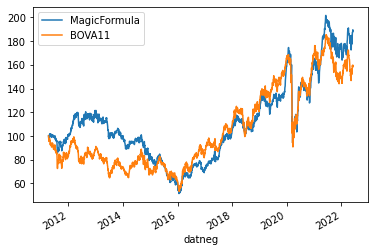

In [73]:
df_return[['MagicFormula', 'BOVA11']].plot()

<AxesSubplot:xlabel='datneg'>

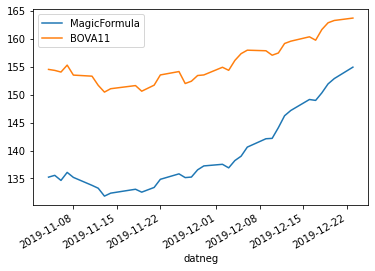

In [74]:
df_return.query('"2019-11-01" < datneg < "2019-12-24"')[['MagicFormula', 'BOVA11']].plot()

In [75]:
df_return.query('"2019-11-01" < datneg < "2019-12-24"')

,next_cutoff,price_n,last_group_price,MagicFormula,BOVA11
datneg,,,,,
2019-11-04,2020-04-09,106,85.4,135,154
2019-11-05,2020-04-09,106,85.4,136,154
2019-11-06,2020-04-09,106,85.4,135,154
...,...,...,...,...,...
2019-12-19,2020-04-09,119,85.4,152,163
2019-12-20,2020-04-09,120,85.4,153,163
2019-12-23,2020-04-09,122,85.4,155,164


In [78]:
import yfinance as yf

In [80]:
data = yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30")
data

[*********************100%***********************]  2 of 2 completed


Adj Close     Close     High      Low     Open         Volume  \
                AAPL SPY  AAPL SPY AAPL SPY AAPL SPY AAPL SPY       AAPL   
Date                                                                       
2017-01-03      27.3 206    29 225 29.1 226 28.7 224   29 225  115127600   
2017-01-04      27.2 207    29 227 29.1 227 28.9 226   29 226   84472400   
2017-01-05      27.4 207  29.2 226 29.2 227   29 225   29 226   88774400   
...              ...  ..   ...  ..  ...  ..  ...  ..  ...  ..        ...   
2017-04-26      33.9 218  35.9 238 36.2 240 35.8 238 36.1 239   80164800   
2017-04-27      33.9 219  35.9 239   36 239 35.8 238   36 239   56985200   
2017-04-28      33.9 218  35.9 238 36.1 239 35.8 238   36 239   83441600   

                      
                 SPY  
Date                  
2017-01-03  91366500  
2017-01-04  78744400  
2017-01-05  78379000  
...              ...  
2017-04-26  84702500  
2017-04-27  57410300  
2017-04-28  63532800  

[81 rows x 12 columns]

In [91]:
stocks_yf = df_stocks.query('cutoff_date == "2011-04-11"').codneg.to_list()
stocks_yf

['CRUZ3',
 'BRPR3',
 'PTBL3',
 'EQTL3',
 'LIGT3',
 'TOTS3',
 'UGPA4',
 'AUTM3',
 'CIEL3',
 'VALE5',
 'BRAP4',
 'SBSP3',
 'LAME4',
 'WHRL4',
 'CMIG4',
 'ECOR3',
 'CSMG3',
 'GETI4',
 'CCIM3',
 'BRKM5',
 'RAPT4',
 'SHUL4',
 'ENGI4',
 'CPFE3',
 'HBOR3',
 'VLID3',
 'TRPL4',
 'ETER3',
 'EVEN3',
 'EUCA4']

In [92]:
stocks_yf = '.SA '.join(stocks_yf)
stocks_yf

'CRUZ3.SA BRPR3.SA PTBL3.SA EQTL3.SA LIGT3.SA TOTS3.SA UGPA4.SA AUTM3.SA CIEL3.SA VALE5.SA BRAP4.SA SBSP3.SA LAME4.SA WHRL4.SA CMIG4.SA ECOR3.SA CSMG3.SA GETI4.SA CCIM3.SA BRKM5.SA RAPT4.SA SHUL4.SA ENGI4.SA CPFE3.SA HBOR3.SA VLID3.SA TRPL4.SA ETER3.SA EVEN3.SA EUCA4'

In [93]:
data = yf.download(stocks_yf, start="2011-04-11", end="2012-04-09")
data

[*********************100%***********************]  30 of 30 completed

7 Failed downloads:
- EUCA4: No data found, symbol may be delisted
- CCIM3.SA: No data found, symbol may be delisted
- LAME4.SA: No data found, symbol may be delisted
- AUTM3.SA: Data doesn't exist for startDate = 1302490800, endDate = 1333940400
- GETI4.SA: No data found for this date range, symbol may be delisted
- CRUZ3.SA: No data found for this date range, symbol may be delisted
- UGPA4.SA: No data found for this date range, symbol may be delisted


Adj Close                                                        \
            AUTM3.SA BRAP4.SA BRKM5.SA BRPR3.SA CCIM3.SA CIEL3.SA CMIG4.SA   
Date                                                                         
2011-04-11       NaN     17.1     11.8     8.58      NaN     4.46     3.96   
2011-04-12       NaN     16.7     11.6     8.48      NaN     4.46     3.93   
2011-04-13       NaN     16.5     11.6     8.39      NaN     4.48     3.96   
...              ...      ...      ...      ...      ...      ...      ...   
2012-01-25       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2012-02-21       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2012-02-22       NaN      NaN      NaN      NaN      NaN      NaN      NaN   

                                       ...   Volume                    \
           CPFE3.SA CRUZ3.SA CSMG3.SA  ... PTBL3.SA RAPT4.SA SBSP3.SA   
Date                                   ...                              
2011-04-11     11.7      NaN     5.28  ... 2.69e+04  8.4e+05 6.95e+05   
2011-04-12     11.9      NaN     5.22  ... 1.18e+05 7.03e+05  5.1e+05   
2011-04-13     11.8      NaN     5.24  ... 1.68e+04 7.57e+05 6.16e+05   
...             ...      ...      ...  ...      ...      ...      ...   
2012-01-25      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2012-02-21      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2012-02-22      NaN      NaN      NaN  ...      NaN      NaN      NaN   

                                                                           
           SHUL4.SA TOTS3.SA TRPL4.SA UGPA4.SA VALE5.SA VLID3.SA WHRL4.SA  
Date                                                                       
2011-04-11 2.24e+04 5.33e+05 3.91e+05      NaN 1.18e+07 1.42e+05  1.5e+03  
2011-04-12      560 3.98e+05 5.14e+05      NaN 1.66e+07 3.84e+05  5.2e+03  
2011-04-13 3.36e+03 1.84e+06 4.14e+05      NaN 1.98e+07 1.08e+05      300  
...             ...      ...      ...      ...      ...      ...      ...  
2012-01-25      NaN      NaN      NaN      NaN        0      NaN      NaN  
2012-02-21      NaN      NaN      NaN      NaN        0      NaN      NaN  
2012-02-22      NaN      NaN      NaN      NaN 1.39e+07      NaN      NaN  

[257 rows x 180 columns]